In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/diabetes.csv" ,encoding='utf-8')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
x = df.drop("Outcome",axis=1).values

In [6]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [7]:
x.shape

(768, 8)

In [8]:
y = df['Outcome'].values

In [9]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [11]:
print(y_test.shape)

(308,)


In [12]:
# find k to model
k_neighbors = np.arange(1,9)
k_neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
# create empty array
training_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))

In [14]:
for i,k in enumerate(k_neighbors):
    # 1,2,3,4,5,6,7,8
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    
    # วัดประสิทธิภาพ
    training_score[i] = knn.score(x_train,y_train)
    test_score[i] = knn.score(x_test,y_test)
    
    # แสดงผลลัพธ์ด้วยคะแนนที่ปัดเศษทศนิยมเป็นเลขทั้งหมด
    print(f"ค่า k = {k}, คะแนนสำหรับชุดทดสอบ: {round(test_score[i] * 100, 2)}%")

ค่า k = 1, คะแนนสำหรับชุดทดสอบ: 67.86%
ค่า k = 2, คะแนนสำหรับชุดทดสอบ: 73.7%
ค่า k = 3, คะแนนสำหรับชุดทดสอบ: 74.35%
ค่า k = 4, คะแนนสำหรับชุดทดสอบ: 73.7%
ค่า k = 5, คะแนนสำหรับชุดทดสอบ: 74.35%
ค่า k = 6, คะแนนสำหรับชุดทดสอบ: 72.73%
ค่า k = 7, คะแนนสำหรับชุดทดสอบ: 75.32%
ค่า k = 8, คะแนนสำหรับชุดทดสอบ: 73.05%


Text(0, 0.5, 'Score')

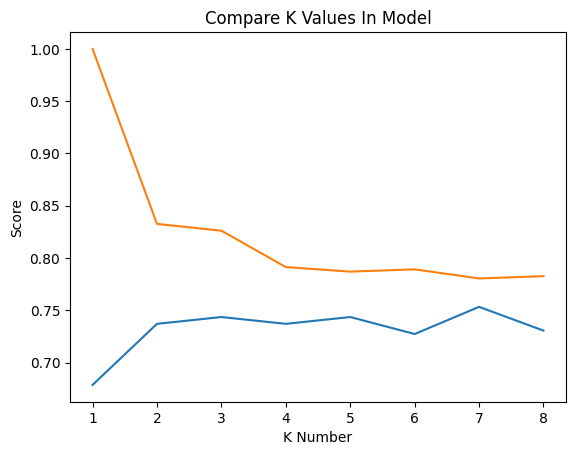

In [15]:
plt.title("Compare K Values In Model")
plt.plot(k_neighbors,test_score,label="Test Score")
plt.plot(k_neighbors,training_score,label="Train Score")
plt.xlabel("K Number")
plt.ylabel("Score")

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
# prediction
y_pred = knn.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       196
           1       0.70      0.56      0.62       112

    accuracy                           0.75       308
   macro avg       0.74      0.71      0.72       308
weighted avg       0.75      0.75      0.75       308



In [21]:
print(confusion_matrix(y_test,y_pred))

[[169  27]
 [ 49  63]]


In [25]:
pd.crosstab(y_test,y_pred,rownames=['Actually'],colnames=['Prediction'],margins=True)

Prediction,0,1,All
Actually,,,
0,169,27,196
1,49,63,112
All,218,90,308
